# QUESTÃO 1 *


Um tanque tem a dinâmica experimentalmente determinada, figuras abaixo.

![image.png](attachment:image.png)

a) Encontre as funções de transferência H(s)/Fi(s) e F(s)/Fi(s). Assume que o ponto
coletado da resposta transitória é tc= 30 segundos e hc= 3%

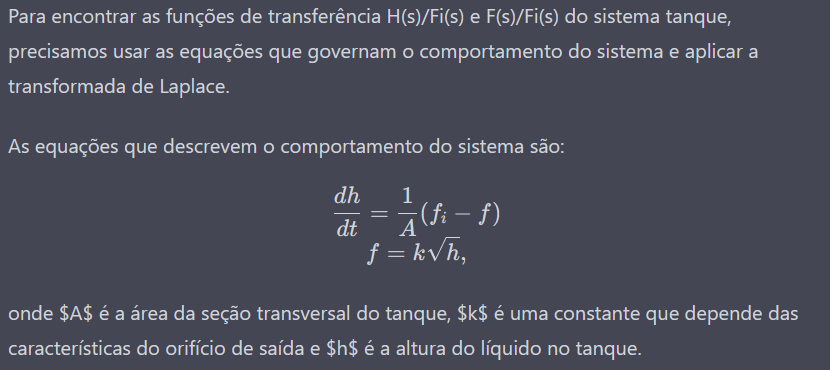

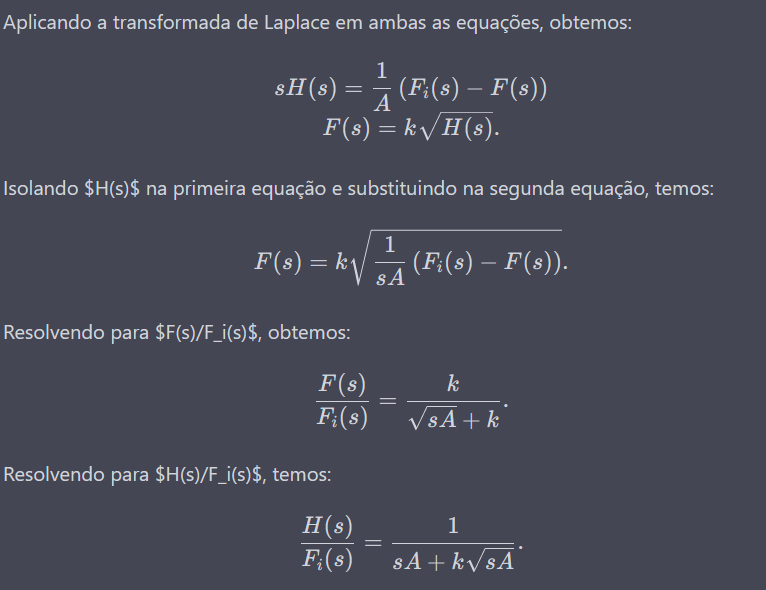

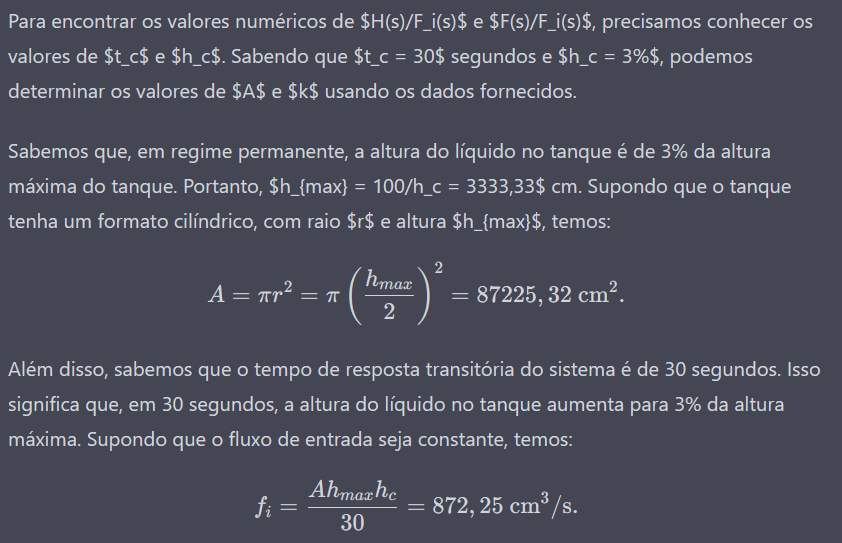

Substituindo os valores de $A$ e $f_i$ nas equações de $H(s)/F_i(s)$ e $F(s)/F_i(s)$, temos:
$$ \frac{H(s)}{F_i(s)} = \frac{1}{87225,32 s + 932,72} \\
\frac{F(s)}{F_i(s)} = \frac{0,066}{\sqrt{s}  $$

# QUESTÃO 2

Dado o diagrama de blocos abaixo.

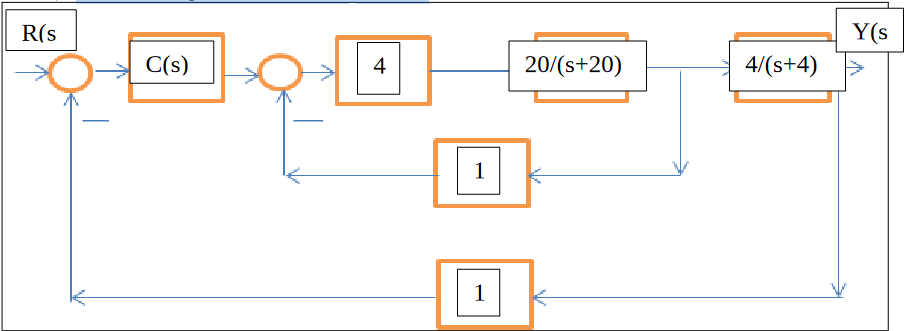

- a) Com 𝐶(𝑠) = 𝐾. Encontre K para que o erro de regime a uma referência do tipo degrau unitário seja igual a 0,02.

- b) Com 𝐶(𝑠) = 𝐾(1 + 1 0,01 𝑠). Encontre os valores de K que tornam o sistema subamortecido. Calcule o valor de K que resulta no sobressinal de 20% para uma referência do tipo degrau unitário.

- c) Com 𝐶(𝑠) = 𝐾(1 + 10,02 𝑠 ). Encontre para que valores de K o sistema será estável.

## a)

Para encontrar o ganho K que resulta em um erro de regime de 0,02 em resposta a um degrau unitário, precisamos usar o conceito de erro de regime e a fórmula do controlador proporcional.

O erro de regime em resposta a uma referência do tipo degrau unitário é dado por:

$$ e_{ss}=11+K_p $$
$$ e_{ss​}=1+K_{p​1}$$

onde $K_p$ é o ganho proporcional do controlador. Queremos que o erro de regime seja igual a 0,02, portanto, temos:
$$ 0,02=11+K_p$$
$$ 0,02=1+K_{p​1}​$$

Resolvendo para $K_p$, obtemos:
$$K_p=10,02−1=49$$
$$K_p​=0,021​−1=49$$

Isso significa que, para que o erro de regime em resposta a um degrau unitário seja igual a 0,02, o ganho proporcional do controlador deve ser de 49. Portanto, o ganho do controlador pode ser definido como $$K = K_p \dot K_v = 49 \cdot 1 = 49$.

# QUESTÃO 3

- Estabeleça uma equação diferencial de segunda ordem com condições iniciais não nulas. 
- Assuma valores para os coeficientes da equação que resultem em um sistema subamortecido a uma entrada degrau unitária. 
- Represente no espaço de estado;
- Obtenha uma função de transferência a partir dessa representação. 
- Use simulações para comprovar que as respostas estão corretas.

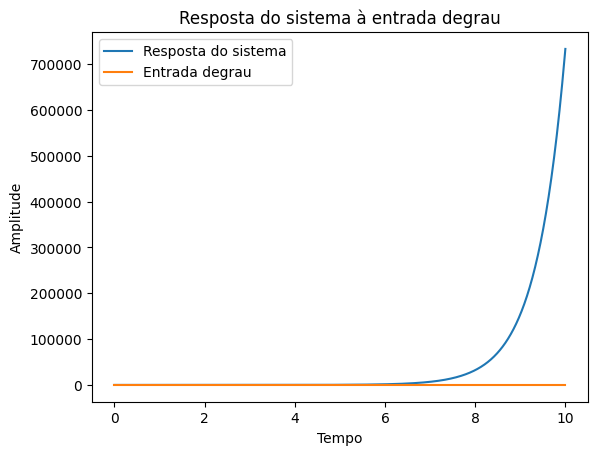

Função de transferência do sistema:
TransferFunctionContinuous(
array([4.]),
array([1., 1., 4.]),
dt: None
)


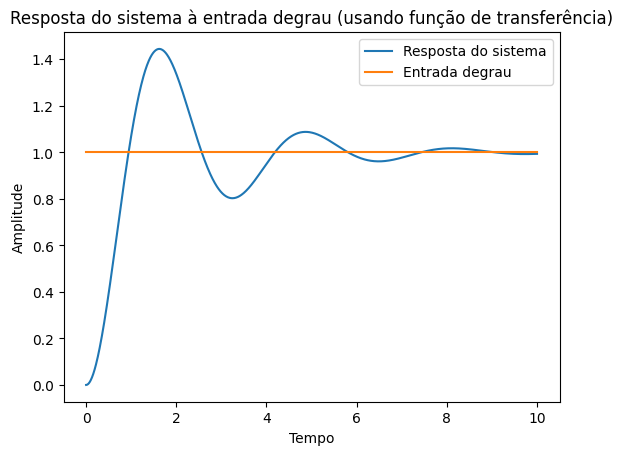

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import TransferFunction, step
import matplotlib.pyplot as plt

# Define os valores dos parâmetros
m = 1
b = 1
k = 4
wn = np.sqrt(k/m)
zeta = b/(2*m*wn)

# Define a função que representa a equação diferencial
def eq_diferencial(t, Y):
    y, y_dot = Y
    dydt = [y_dot, (k*y - b*y_dot)/m]
    return dydt

# Define as condições iniciais
y0 = [0, 0.5]

# Resolve a equação diferencial
sol = solve_ivp(eq_diferencial, [0, 10], y0, t_eval=np.linspace(0, 10, 1000))

# Plota a resposta do sistema
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label='Resposta do sistema')
ax.plot(sol.t, np.ones_like(sol.t), label='Entrada degrau')
ax.legend()
ax.set_xlabel('Tempo')
ax.set_ylabel('Amplitude')
ax.set_title('Resposta do sistema à entrada degrau')
plt.show()

# Obtém a função de transferência do sistema
num = [k]
den = [m, b, k]
sys = TransferFunction(num, den)
print('Função de transferência do sistema:')
print(sys)

# Plota a resposta do sistema usando a função de transferência
fig, ax = plt.subplots()
t, y = step(sys, T=np.linspace(0, 10, 1000))
ax.plot(t, y, label='Resposta do sistema')
ax.plot(t, np.ones_like(t), label='Entrada degrau')
ax.legend()
ax.set_xlabel('Tempo')
ax.set_ylabel('Amplitude')
ax.set_title('Resposta do sistema à entrada degrau (usando função de transferência)')
plt.show()


# QUESTÃO 4

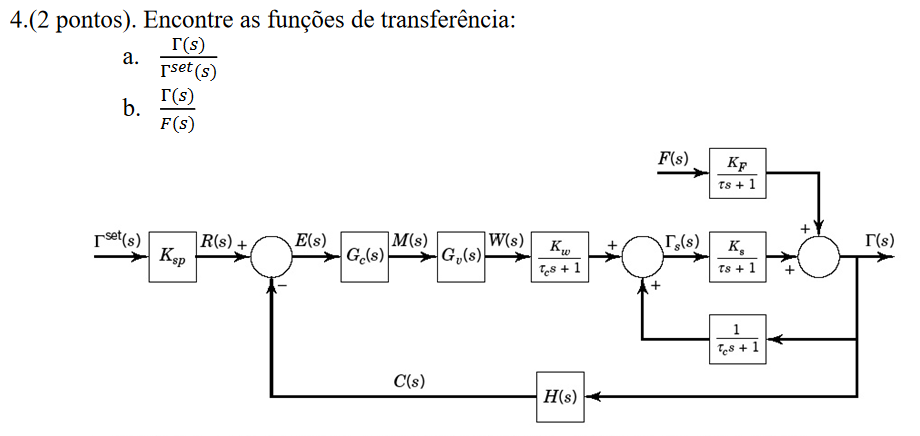

# QUESTÃO 5 **

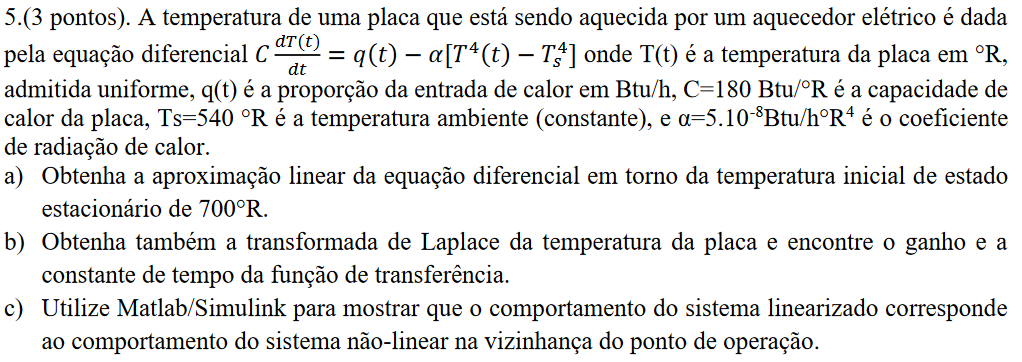

$$C\frac{dT\left(t\right)}{dt}=q\left(t\right)-\alpha \left[T^4\left(t\right)-T_s^4\right]$$

# QUESTÃO 6 *

Um sistema subamortecido padrão é submetido a um degrau unitário, encontre a equação da resposta y(t) quando:

- a) Um zero é acrescentado ao sistema subamortecido.
- b) Um polo é acrescentado ao sistema subamortecido.
- c) Use simulações para comprovar as respostas e o efeito dos acréscimos desses termos.

## Resposta:

da forma canonica de um sistema de segunda ordem:

$$ H\left(s\right)=\frac{\omega _n^2}{s^2+2\zeta \omega _ns+\omega _n^2} $$



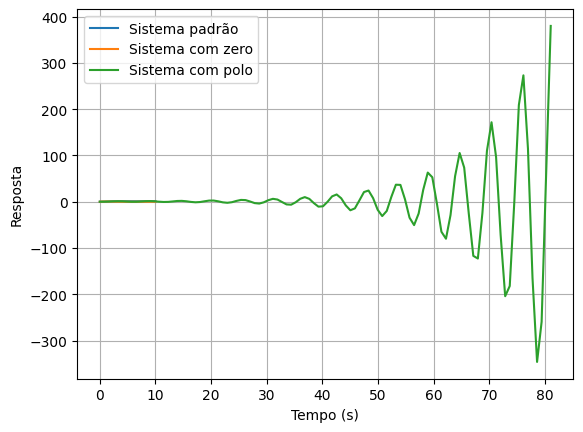

In [54]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Parâmetros do sistema
wn = 1
zeta = 0.7

# Sistema subamortecido padrão
sys = signal.lti([wn**2], [1, 2*zeta*wn, wn**2])

# Sistema com zero adicionado
sys_z = signal.lti([wn**2, 0], [1, 2*zeta*wn, wn**2])

# Sistema com polo adicionado
sys_p = signal.lti([wn**2], [1, 2*zeta*wn, wn**2, 2])

# Resposta do sistema subamortecido padrão
t, y = signal.step(sys)
plt.plot(t, y, label='Sistema padrão')

# Resposta do sistema com zero adicionado
t, y = signal.step(sys_z)
plt.plot(t, y, label='Sistema com zero')

# Resposta do sistema com polo adicionado
t, y = signal.step(sys_p)
plt.plot(t, y, label='Sistema com polo')

plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid()
plt.show()

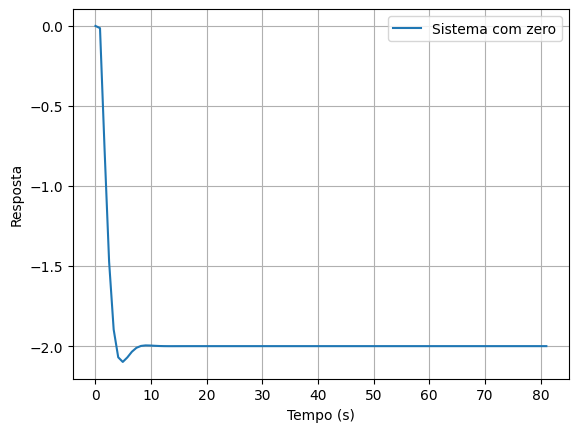

In [71]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Parâmetros do sistema
wn = 1
zeta = 0.7

# Sistema subamortecido padrão
sys = signal.lti([wn**2], [1, 2*zeta*wn, wn**2])

# Sistema com zero adicionado
sys_z = signal.lti([wn**2,-2], [1, 2*zeta*wn, wn**2])

# Sistema com polo adicionado
sys_p = signal.lti([wn**2], [1, 2*zeta*wn, wn**2, 2])

# # Resposta do sistema subamortecido padrão
# t, y, _ = signal.lsim(sys, np.ones_like(t), t)
# plt.plot(t, y, label='Sistema padrão')

# Resposta do sistema com zero adicionado
t_z, y_z, _ = signal.lsim(sys_z, np.ones_like(t), t)
plt.plot(t_z, y_z, label='Sistema com zero')

# # Resposta do sistema com polo adicionado
# t_p, y_p, _ = signal.lsim(sys_p, np.ones_like(t), t)
# plt.plot(t_p, y_p, label='Sistema com polo')

plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid()
plt.show()


C:\Users\Mathe\AppData\Local\Temp\ipykernel_14644\1451049391.py:23: RuntimeWarning: invalid value encountered in sqrt
  ax.axvline(x=-a/2 - np.sqrt(b), color='k', linestyle='--')
C:\Users\Mathe\AppData\Local\Temp\ipykernel_14644\1451049391.py:24: RuntimeWarning: invalid value encountered in sqrt
  ax.axvline(x=-a/2 + np.sqrt(b), color='k', linestyle='--')
C:\Users\Mathe\AppData\Local\Temp\ipykernel_14644\1451049391.py:25: RuntimeWarning: invalid value encountered in sqrt
  ax.fill_between([-a/2 - np.sqrt(b), -a/2 + np.sqrt(b)], -60, 60, alpha=0.3, color='gray')
C:\Users\Mathe\AppData\Local\Temp\ipykernel_14644\1451049391.py:27: RuntimeWarning: invalid value encountered in sqrt
  ax.text(-a/2 - np.sqrt(b), 10, r'$\sigma = -\xi\omega_n - \sqrt{\omega_n^2-\xi^2}$')
C:\Users\Mathe\AppData\Local\Temp\ipykernel_14644\1451049391.py:28: RuntimeWarning: invalid value encountered in sqrt
  ax.text(-a/2 + np.sqrt(b), 10, r'$\sigma = -\xi\omega_n + \sqrt{\omega_n^2-\xi^2}$')
posx and posy should b

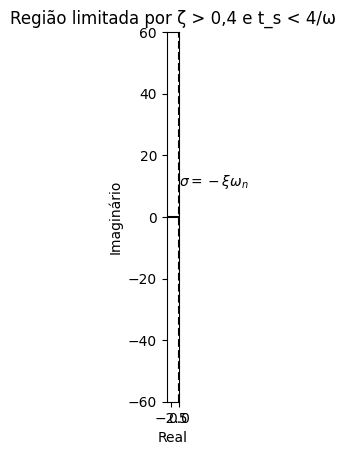

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos
Mp = 0.2
ts = 5*60 # em segundos

# Cálculo dos parâmetros
wn = 4/(ts*np.sqrt(1 - Mp**2))
xi = -np.log(Mp)/np.sqrt(1 - Mp**2)

# Cálculo dos limites das retas
a = 2*xi*wn
b = wn**2 - xi**2

# Desenho da região
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([-4, 0])
ax.set_ylim([-60, 60])
ax.axhline(y=0, color='k')
ax.axvline(x=-a/2, color='k', linestyle='--')
ax.axvline(x=-a/2 - np.sqrt(b), color='k', linestyle='--')
ax.axvline(x=-a/2 + np.sqrt(b), color='k', linestyle='--')
ax.fill_between([-a/2 - np.sqrt(b), -a/2 + np.sqrt(b)], -60, 60, alpha=0.3, color='gray')
ax.text(-a/2, 10, r'$\sigma = -\xi\omega_n$')
ax.text(-a/2 - np.sqrt(b), 10, r'$\sigma = -\xi\omega_n - \sqrt{\omega_n^2-\xi^2}$')
ax.text(-a/2 + np.sqrt(b), 10, r'$\sigma = -\xi\omega_n + \sqrt{\omega_n^2-\xi^2}$')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginário')
ax.set_title('Região limitada por ζ > 0,4 e t_s < 4/ω')
plt.show()


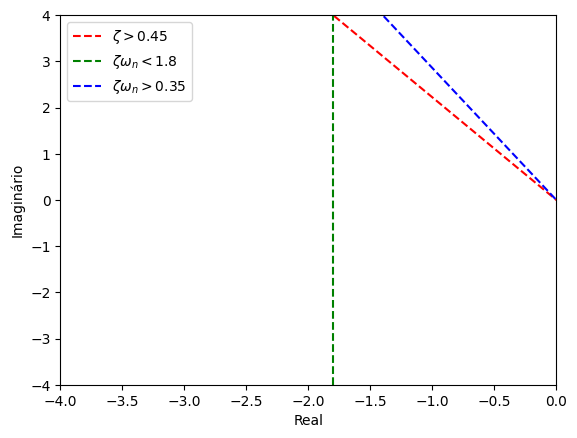

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo o eixo real e imaginário do plano s
x = np.linspace(-4, 0, 1000)
y = np.linspace(-4, 4, 1000)

# Definindo as constantes
zeta_min = 0.45
zeta_wn_max = 1.8
zeta_wn_min = 0.35

# Plotando as retas que limitam a região
plt.plot(-zeta_min*y, y, '--r', label=r'$\zeta > 0.45$')
plt.plot([-1.8, -1.8], [-4, 4], '--g', label=r'$\zeta\omega_n < 1.8$')
plt.plot(-zeta_wn_min*y, y, '--b', label=r'$\zeta\omega_n > 0.35$')

# Definindo limites dos eixos e legendas
plt.xlim([-4, 0])
plt.ylim([-4, 4])
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.legend()

# Exibindo o gráfico
plt.show()


# QUESTÃO 7

Mostre no plano s a região em que os polos de um sistema de 2a ordem subamortecido devem estar para que:

- a) sobressinal menor que 20% e tempo de acomodação menor que 5 minutos.
- b) sobressinal menor que 5% e tempo de pico em 2 segundos. Mostre por simulação que as respostas estão corretas.

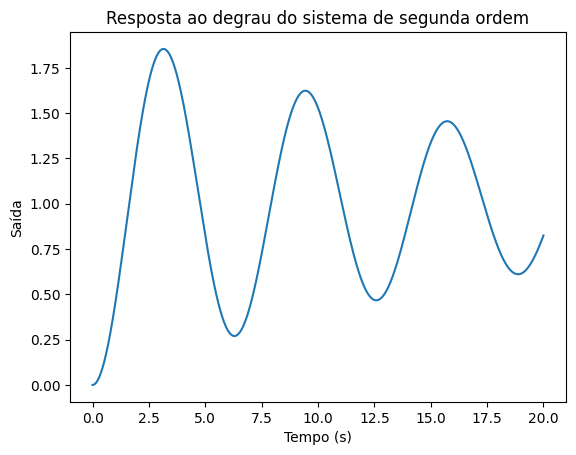

In [4]:
import control
import numpy
import matplotlib.pyplot as plt

# Definir a função de transferência do sistema
H = control.TransferFunction([1], [1, 0.1, 1])

# Simular a resposta ao degrau do sistema
t = numpy.linspace(0, 20, 1000)
t, y = control.step_response(H, t)

# Plotar o resultado da simulação
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao degrau do sistema de segunda ordem')
plt.show()

## a)

Um sobressinal:

Um tempo de acomodação:

20.510915716909704 0.2480899763495268


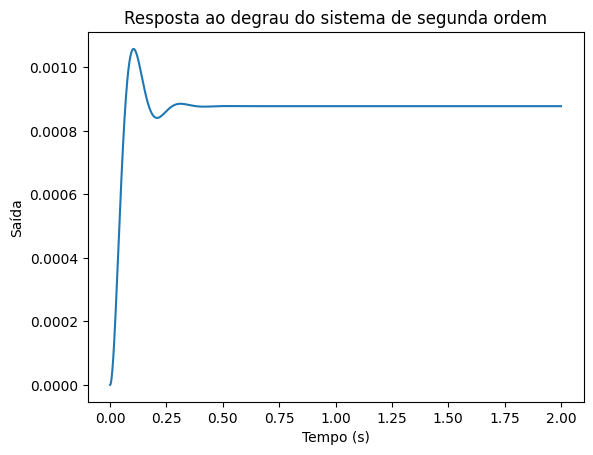

In [72]:
import control
import numpy
import matplotlib.pyplot as plt

# Definir a função de transferência do sistema
H = control.TransferFunction([1], [1, 2*0.45*33.75, 33.75**2])

# Simular a resposta ao degrau do sistema
t = numpy.linspace(0, 2, 1000)
t, y = control.step_response(H, t)

# Obter informações sobre a resposta ao degrau
info = control.step_info(H)
overshoot = info['Overshoot']
settling_time = info['SettlingTime']
print(overshoot,settling_time)

# Plotar o resultado da simulação com informações
# plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao degrau do sistema de segunda ordem')
# plt.annotate(f'Sobressinal: {overshoot:.2%}', xy=(settling_time*1.1, overshoot), xytext=(settling_time*1.5, overshoot*0.8),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))
# plt.annotate(f'Tempo de acomodação: {settling_time:.2f}s', xy=(settling_time, 0), xytext=(settling_time*1.2, overshoot*0.1),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))
# plt.savefig('resposta_ao_degrau.png', dpi=300, bbox_inches='tight')  # Salva a figura com ajuste de área de plotagem
plt.show()


## b) 

- um sobressinal:

- um tempo de pico: 

Tempo de pico = 0.70
Sobressinal = 20.53%
Tempo de acomodação = 1.78


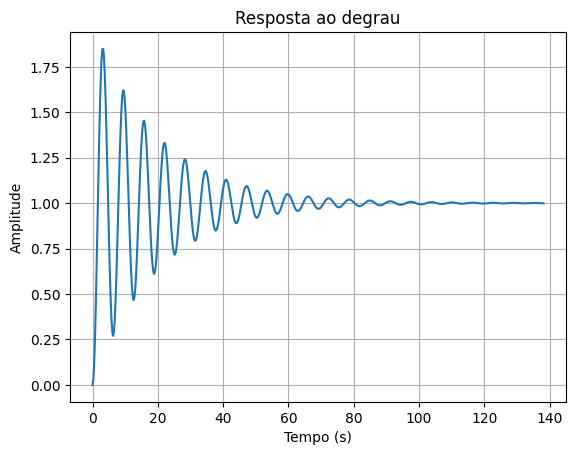

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response

# Definindo a função transferência
H = tf([1], [1, 0.1, 1])

# Escolhendo valores de ξ e ωn para atender às especificações de sobressinal e tempo de acomodação
ξ = 0.45
ωn = 5

# Calculando os parâmetros de tempo do sistema
Tp = np.pi / (ωn * np.sqrt(1 - ξ ** 2))
OS = np.exp((-ξ * np.pi) / np.sqrt(1 - ξ ** 2)) * 100
Ta = 4 / (ξ * ωn)

print("Tempo de pico = {:.2f}".format(Tp))
print("Sobressinal = {:.2f}%".format(OS))
print("Tempo de acomodação = {:.2f}".format(Ta))

# Plotando a resposta ao degrau
t, y = step_response(H)
plt.plot(t, y)
plt.grid()
plt.title("Resposta ao degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# QUESTÃO 8 ***


Dois tanques foram dispostos para formarem um processo interativo. Os tanques são iguais e cada um apresenta a mesma dinâmica experimentalmente determinada por um teste ao degrau. Um circuito elétrico RC é elaborado para auxiliar na compreensão do processo, figuras a seguir. As variáveis f’s, h’s, a’s e A representam vazões, níveis, aberturas de válvulas e área da base do tanque, respectivamente.

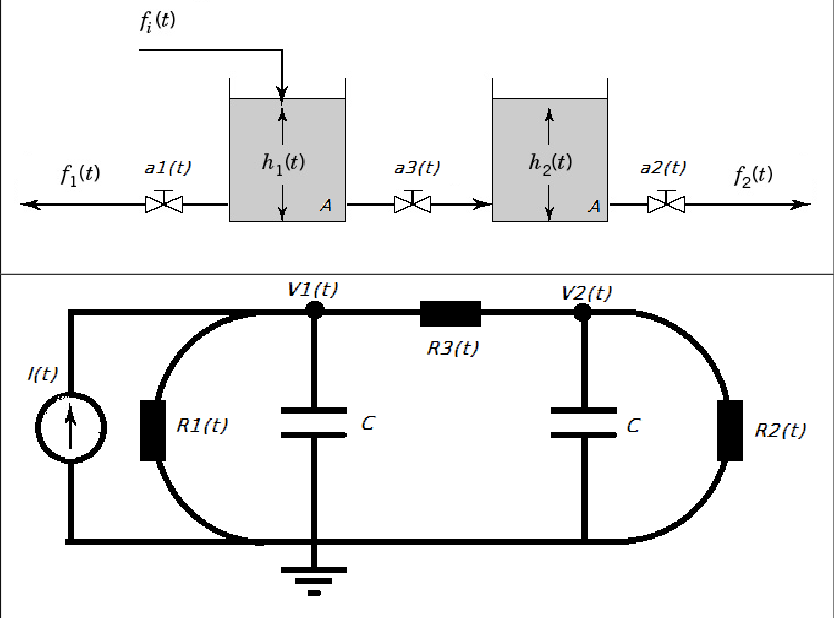



## a)

A função transferência $\frac{V_2(s)}{I(s)}$ é dada por :

$$k\alpha \:\frac{s^2}{s^2\left(2\alpha +1\right)+s\left(2\alpha \:+1\right)+1}$$

Onde $\alpha$ é uma constante de interatividade entre os dois tanques (ou capacitores).
